<a href="https://colab.research.google.com/github/SimarBhatiaSB7/EDA-Project-22BDS0046/blob/main/22BDS0046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
from google.colab import files
dataset = files.upload()

Saving KosteckiDillon.csv to KosteckiDillon (1).csv


In [4]:
import pandas as pd

df_0046 = pd.read_csv('KosteckiDillon.csv')
print(df_0046.head(7))

   rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [5]:
# Dimensions of the table
print("Dataset Dimensions:", df_0046.shape)

Dataset Dimensions: (4152, 10)


The dataset has 4,152 rows and 10 columns, which is a moderately large dataset, suitable for statistical analysis and visual exploration.

In [6]:
# Summary Statistics

print("Summary Statistics:")
print(df_0046.describe(include='all'))

print("\nData Types: ")
print(df_0046.dtypes)

Summary Statistics:
           rownames           id         time          dos   hatype  \
count   4152.000000  4152.000000  4152.000000  4152.000000     4152   
unique          NaN          NaN          NaN          NaN        3   
top             NaN          NaN          NaN          NaN  No Aura   
freq            NaN          NaN          NaN          NaN     1985   
mean    2076.500000    66.386802    15.455684   646.705925      NaN   
std     1198.723488    39.121812    21.737211   335.770123      NaN   
min        1.000000     1.000000   -29.000000    98.000000      NaN   
25%     1038.750000    33.000000     3.000000   384.000000      NaN   
50%     2076.500000    67.000000    12.000000   623.000000      NaN   
75%     3114.250000   100.000000    24.000000   950.000000      NaN   
max     4152.000000   133.000000    99.000000  1239.000000      NaN   

                age         airq  medication headache     sex  
count   4152.000000  4152.000000        4152     4152    4152  

The dataset contains both numeric (rownames, id, time, dos, age, airq) and categorical (hatype, medication, headache, sex) variables.

Some numeric columns (e.g., rownames, id, dos) have extremely high correlations, they might represent identifiers or sequential values rather than meaningful continuous variables.

In [7]:
#Data Handling

print("Missing Values:", pd.isna(df_0046).any())
print("\nDuplicated Values:", df_0046.duplicated())

Missing Values: rownames      False
id            False
time          False
dos           False
hatype        False
age           False
airq          False
medication    False
headache      False
sex           False
dtype: bool

Duplicated Values: 0       False
1       False
2       False
3       False
4       False
        ...  
4147    False
4148    False
4149    False
4150    False
4151    False
Length: 4152, dtype: bool


The dataset is clean in terms of completeness; no imputation is required, and no duplicate removal is necessary.

In [8]:
#Data Handling

# Drop duplicates
df_0046 = df_0046.drop_duplicates().copy()

# Fill missing values correctly
for col in df_0046.columns:
    if df_0046[col].dtype in ['int64', 'float64']:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mean())
    else:
        df_0046[col] = df_0046[col].fillna(df_0046[col].mode()[0])

print("Clean Dataset:\n\n", df_0046.head(7))

Clean Dataset:

    rownames  id  time  dos hatype  age  airq  medication headache     sex
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female


In [9]:
#Data Binning

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-19', '20-39', '40-59', '60-79', '80+']
df_0046_bin = df_0046.copy()
df_0046_bin['age_group'] = pd.cut(df_0046_bin['age'], bins=age_bins, labels=age_labels, right=False)

print("\nAge group counts:\n", df_0046_bin['age_group'].value_counts())

print("\n\nDataset binned by age:\n",df_0046_bin.head(7))


Age group counts:
 age_group
40-59    2261
20-39    1525
60-79     291
0-19       75
80+         0
Name: count, dtype: int64


Dataset binned by age:
    rownames  id  time  dos hatype  age  airq  medication headache     sex  \
0         1   1   -11  753   Aura   30   9.0  continuing      yes  female   
1         2   1   -10  754   Aura   30   7.0  continuing      yes  female   
2         3   1    -9  755   Aura   30  10.0  continuing      yes  female   
3         4   1    -8  756   Aura   30  13.0  continuing      yes  female   
4         5   1    -7  757   Aura   30  18.0  continuing      yes  female   
5         6   1    -6  758   Aura   30  19.0  continuing      yes  female   
6         7   1    -5  759   Aura   30  17.0  continuing      yes  female   

  age_group  
0     20-39  
1     20-39  
2     20-39  
3     20-39  
4     20-39  
5     20-39  
6     20-39  


In [12]:
# Outlier Detection (IQR Method)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

num_cols = df_0046.select_dtypes(include=np.number).columns

outlier_summary = {}
for col in num_cols:
    Q1 = df_0046[col].quantile(0.25)
    Q3 = df_0046[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = df_0046[(df_0046[col] < lower) | (df_0046[col] > upper)].shape[0]
    outlier_summary[col] = outlier_count

    df_0046 = df_0046[(df_0046[col] >= lower) & (df_0046[col] <= upper)]

print("Outlier counts per numeric column:", outlier_summary)
print("Updated dataset after removing outliers:", df_0046.shape)

Outlier counts per numeric column: {'rownames': 0, 'id': 0, 'time': 210, 'dos': 0, 'age': 0, 'airq': 151}
Updated dataset after removing outliers: (3791, 10)


#Univariate Analysis


In [13]:
# Univariate Analysis
#Descriptive Statistics of the entire dataset
print(df_0046.describe(),"\n")

          rownames           id         time          dos          age  \
count  3791.000000  3791.000000  3791.000000  3791.000000  3791.000000   
mean   2112.800580    67.600106    12.477710   655.864943    42.501451   
std    1193.930346    38.915556    16.713209   333.861701    11.319464   
min       1.000000     1.000000   -28.000000    99.000000    18.000000   
25%    1116.500000    35.000000     3.000000   405.000000    33.000000   
50%    2155.000000    70.000000    11.000000   642.000000    44.000000   
75%    3132.500000   101.000000    21.000000   953.000000    51.000000   
max    4152.000000   133.000000    55.000000  1239.000000    66.000000   

              airq  
count  3791.000000  
mean     23.807702  
std       7.890558  
min       3.000000  
25%      18.000000  
50%      24.000000  
75%      28.000000  
max      45.000000   



Text(0.5, 0, 'Status')

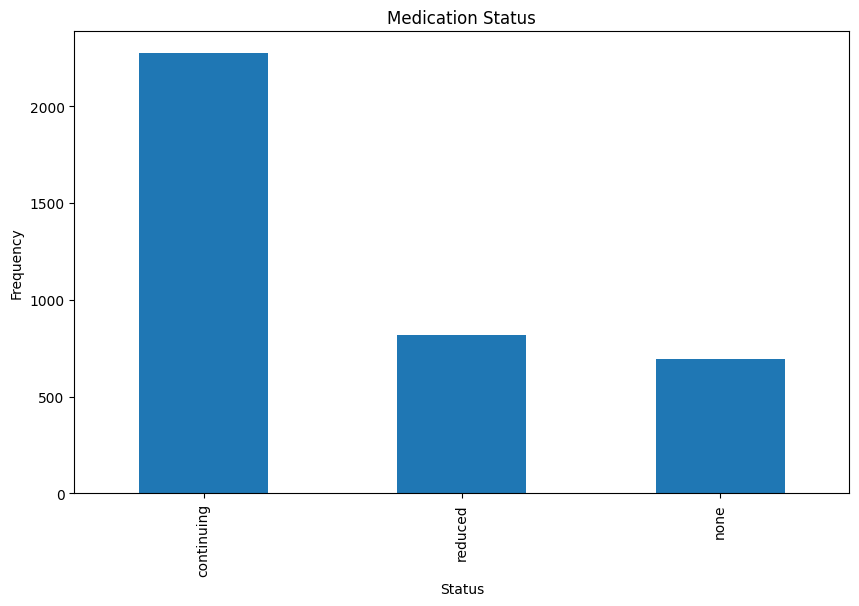

In [14]:
#Taking 50 largest values and draw a bar chart for medicine
df_0046.medication.value_counts().nlargest(100).plot(kind='bar', figsize=(10,6))
plt.title("Medication Status")
plt.ylabel('Frequency')
plt.xlabel('Status')

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


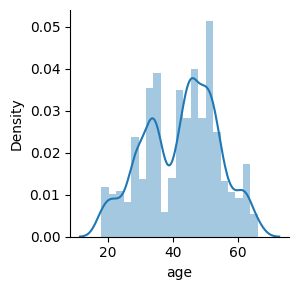

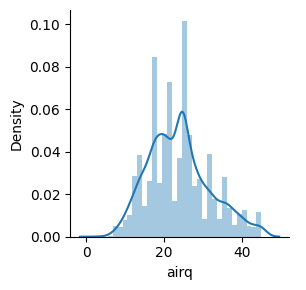

In [15]:
sns.FacetGrid(df_0046).map(sns.distplot,"age").add_legend()
print("\n")
sns.FacetGrid(df_0046).map(sns.distplot,"airq").add_legend()

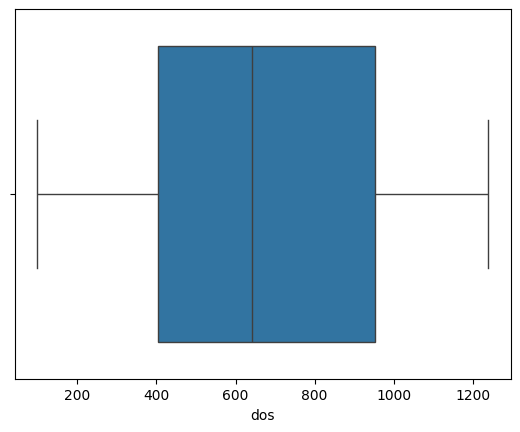

In [16]:
sns.boxplot(x="dos",data=df_0046)
plt.show()

#Bivariate Analysis

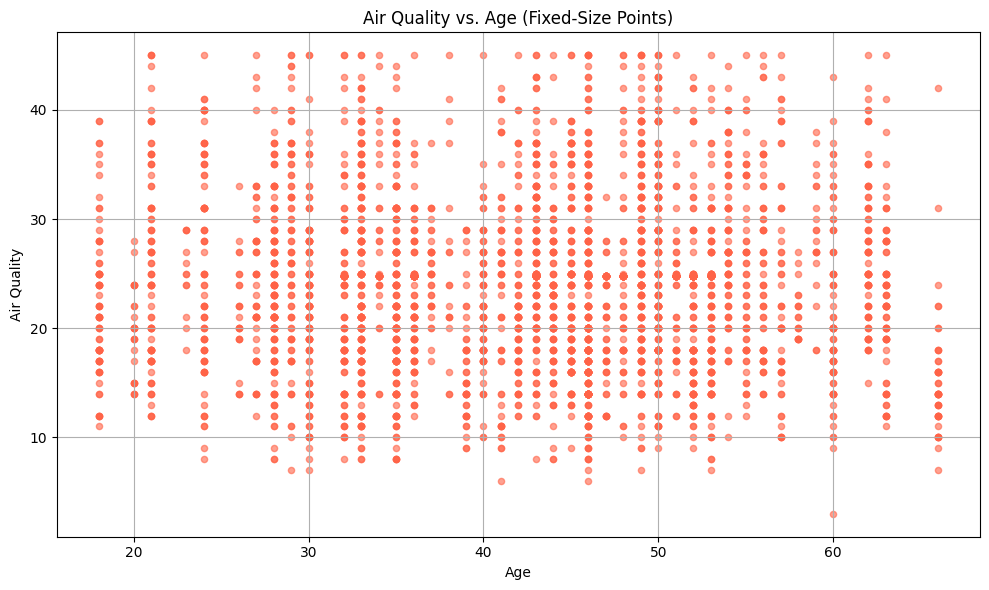

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_0046['age'], df_0046['airq'], s=20, alpha=0.6, color='tomato')
plt.title('Air Quality vs. Age (Fixed-Size Points)')
plt.xlabel('Age')
plt.ylabel('Air Quality')
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_fixed_size.png')

In [18]:
#Relationship between two features
print(np.corrcoef(df_0046['age'], df_0046['airq']))
print("\n")
print(np.corrcoef(df_0046['age'], df_0046['dos']))
print("\n")
print(np.corrcoef(df_0046['dos'], df_0046['airq']))

[[ 1.         -0.01352406]
 [-0.01352406  1.        ]]


[[ 1.00000000e+00 -1.39235339e-04]
 [-1.39235339e-04  1.00000000e+00]]


[[ 1.         -0.10363695]
 [-0.10363695  1.        ]]


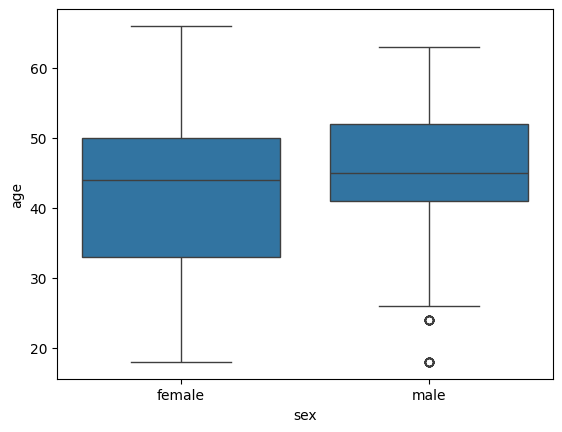

In [19]:
#Box plot
sns.boxplot(x="sex",y="age",data=df_0046)
plt.show()

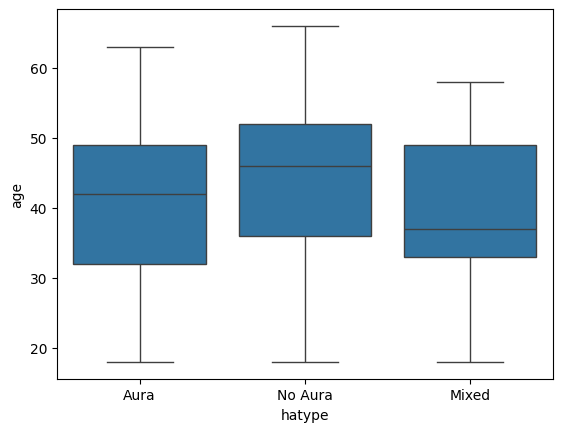

In [20]:
sns.boxplot(x="hatype",y="age",data=df_0046)
plt.show()

#Multivariate Analysis

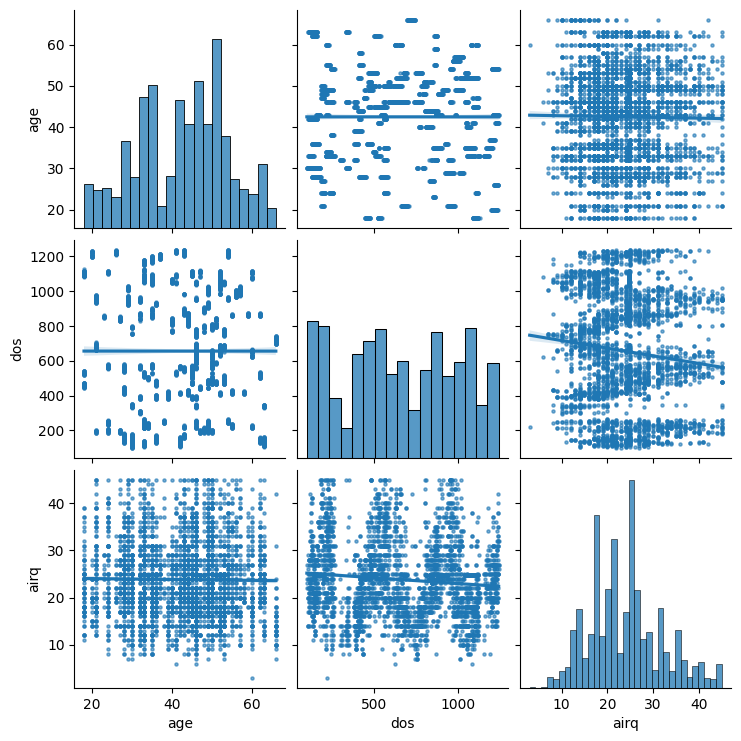

In [21]:
# pair plot with plot type regression
sns.pairplot(df_0046, vars=['age', 'dos', 'airq'], kind="reg", plot_kws={'scatter_kws': {'s': 5, 'alpha': 0.6}})
plt.show()

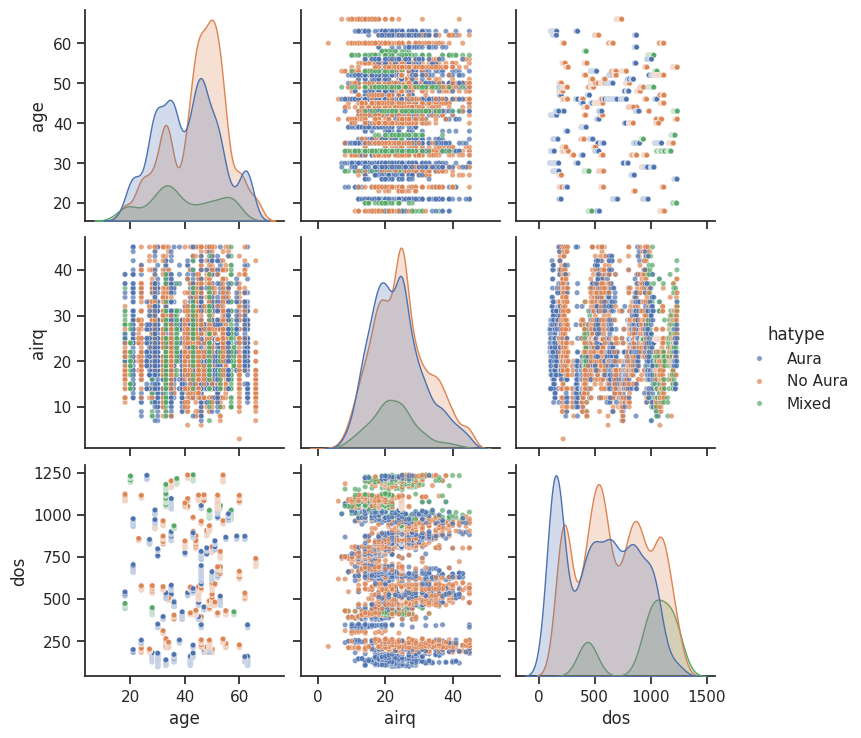

In [22]:
sns.set(style="ticks")
sns.pairplot(df_0046,
             vars=['age', 'airq', 'dos'],
             hue='hatype',
             height=2.5,
             plot_kws={'s': 15, 'alpha': 0.7})
plt.show()

In [23]:
correlation = df_0046.corr(method='pearson', numeric_only=True)
correlation

,rownames,id,time,dos,age,airq
rownames,1.000000,0.999381,-0.123510,0.969547,0.035125,-0.077276
id,0.999381,1.000000,-0.129044,0.969230,0.036767,-0.075657
time,-0.123510,-0.129044,1.000000,-0.084791,-0.031556,0.047117
dos,0.969547,0.969230,-0.084791,1.000000,-0.000139,-0.103637
age,0.035125,0.036767,-0.031556,-0.000139,1.000000,-0.013524
airq,-0.077276,-0.075657,0.047117,-0.103637,-0.013524,1.000000


<Axes: >

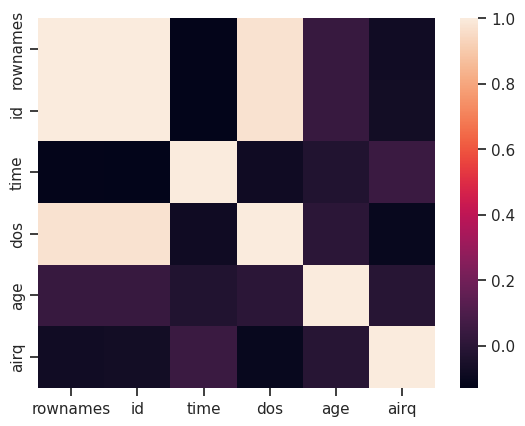

In [24]:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

##1D Analysis

In [27]:
# Skewness and Quantiles
print("Skewness of Numerical Variables")
numeric_features = ['time', 'dos', 'age', 'airq']
skew_vals = df_0046[numeric_features].skew()
print(skew_vals)
print("\n" + "-"*60)


print("\nQuantiles (25%, 50%, 75%) of Numerical Variables")
quantile_vals = df_0046[numeric_features].quantile([0.25, 0.5, 0.75])
print(quantile_vals)
print("\n" + "-"*60)

Skewness of Numerical Variables
time    0.160504
dos    -0.012425
age    -0.182776
airq    0.485485
dtype: float64

------------------------------------------------------------

Quantiles (25%, 50%, 75%) of Numerical Variables
      time    dos   age  airq
0.25   3.0  405.0  33.0  18.0
0.50  11.0  642.0  44.0  24.0
0.75  21.0  953.0  51.0  28.0

------------------------------------------------------------



### Visualizing Frequency Distributions ###


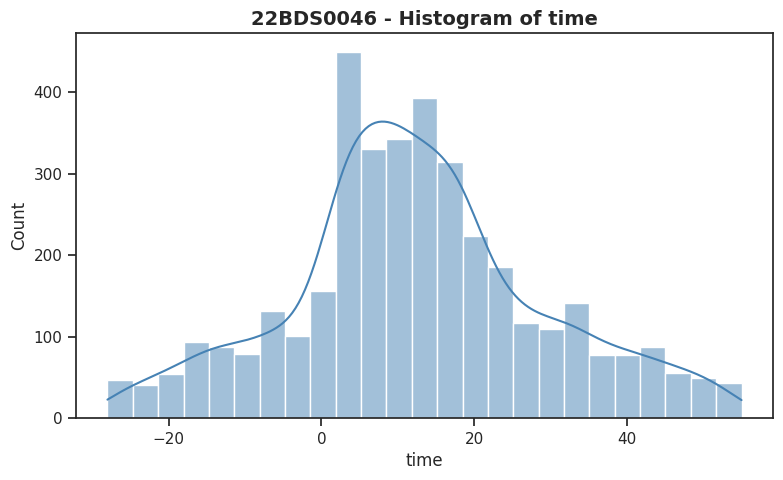

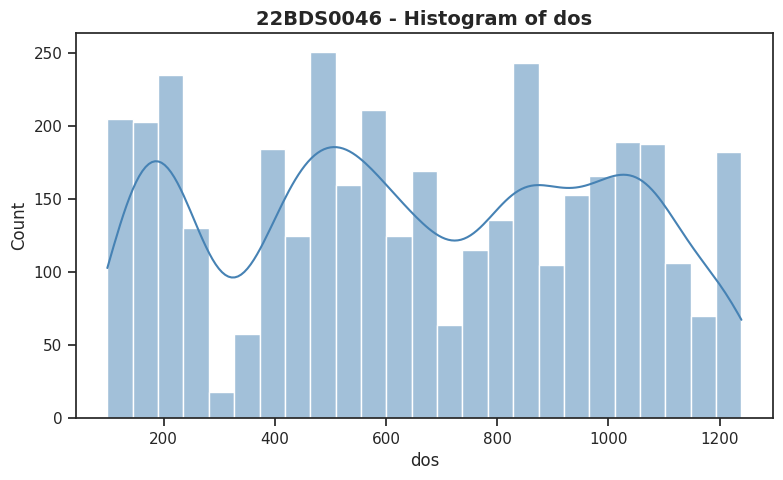

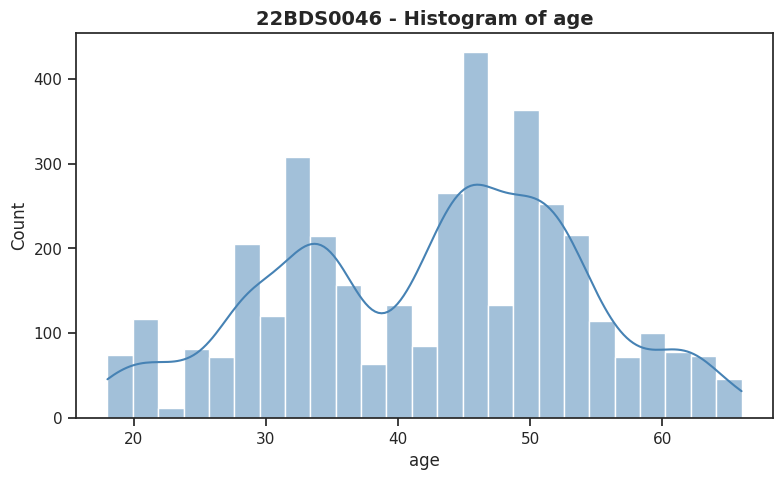

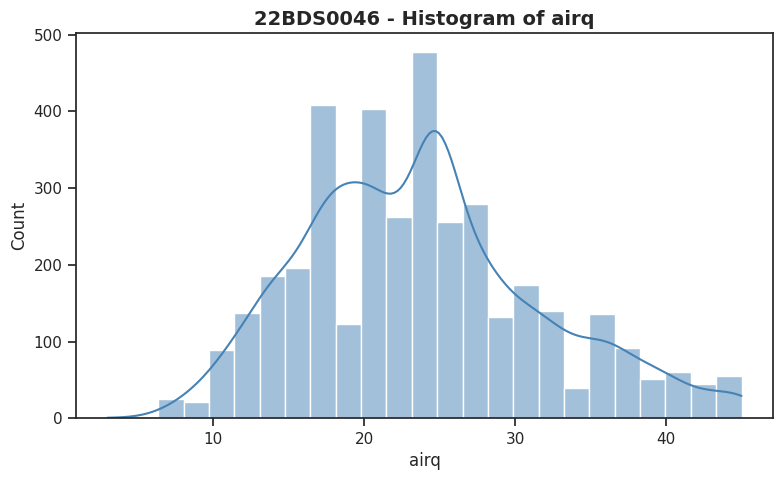

In [29]:
# Frequency Distributions (Histograms for Numerical Data)
print("\n### Visualizing Frequency Distributions ###")
for feature in numeric_features:
  plt.figure(figsize=(9, 5))
  sns.histplot(df_0046[feature], kde=True, bins=25, color="steelblue")
  plt.title(f"22BDS0046 - Histogram of {feature}", fontsize=14, weight='bold')
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.show()


Categorical Variable Analysis

--- Distribution of Sex ---
        Count  Percentage
sex                      
female   3293       86.86
male      498       13.14


/tmp/ipython-input-2025242144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")


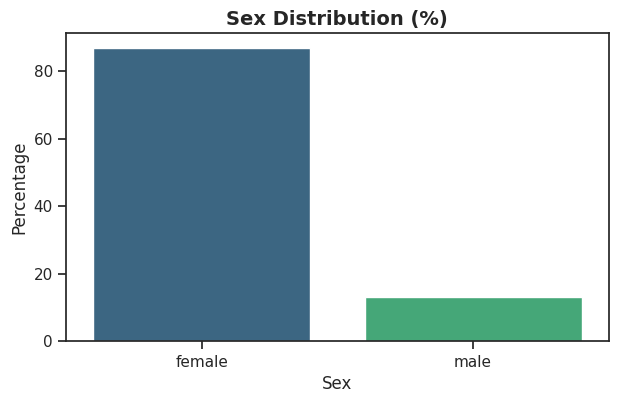


--- Distribution of Headache ---
          Count  Percentage
headache                   
yes        2430        64.1
no         1361        35.9


/tmp/ipython-input-2025242144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")


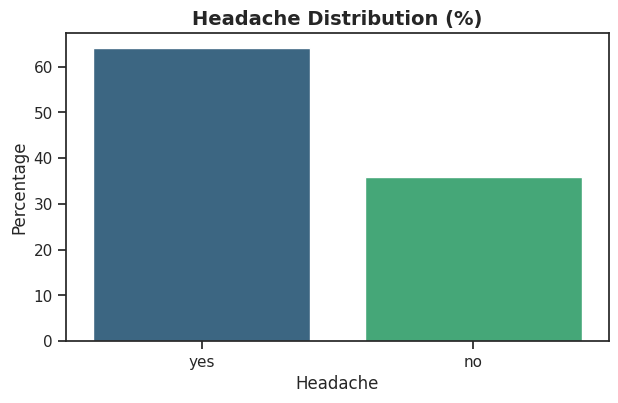


--- Distribution of Medication ---
            Count  Percentage
medication                   
continuing   2273       59.96
reduced       821       21.66
none          697       18.39


/tmp/ipython-input-2025242144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")


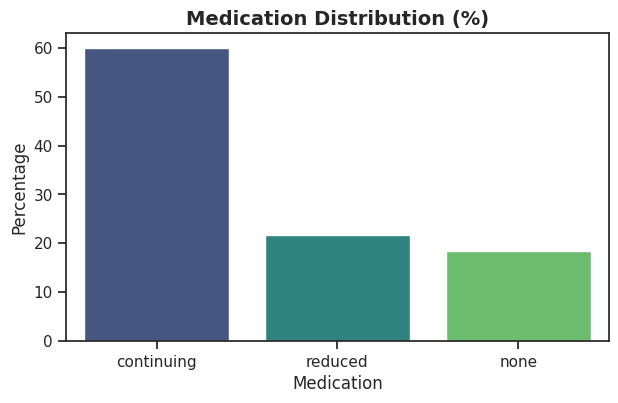


--- Distribution of Hatype ---
         Count  Percentage
hatype                    
No Aura   1756       46.32
Aura      1630       43.00
Mixed      405       10.68


/tmp/ipython-input-2025242144.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")


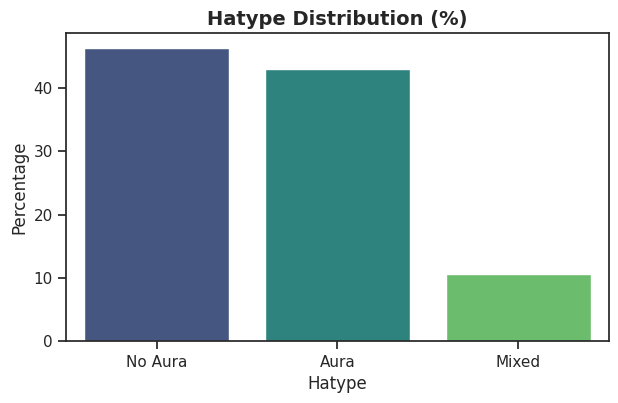

In [31]:
# Categorical Variable Analysis
print("\nCategorical Variable Analysis")

categorical_features = ['sex', 'headache', 'medication', 'hatype']

for cat in categorical_features:
  print(f"\n--- Distribution of {cat.capitalize()} ---")
  counts = df_0046[cat].value_counts()
  rel_freq = df_0046[cat].value_counts(normalize=True) * 100
  summary = pd.DataFrame({"Count": counts, "Percentage": rel_freq.round(2)})
  print(summary)


  plt.figure(figsize=(7, 4))
  sns.barplot(x=summary.index, y=summary['Percentage'], palette="viridis")
  plt.title(f"{cat.capitalize()} Distribution (%)", fontsize=14, weight='bold')
  plt.ylabel("Percentage")
  plt.xlabel(cat.capitalize())
  plt.show()

## 2D Analysis


Numerical vs Numerical 

Drawing Pairplot for numeric features...


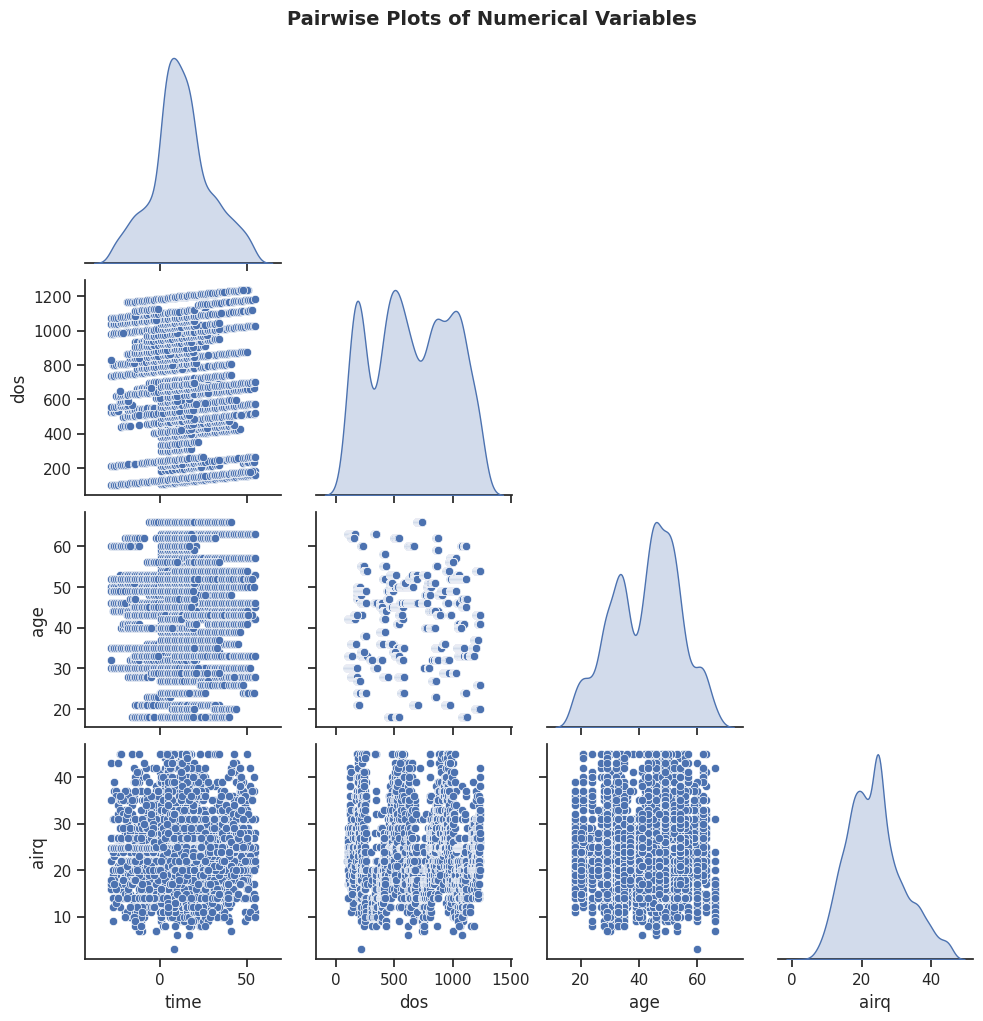


Scatterplot with regression line...


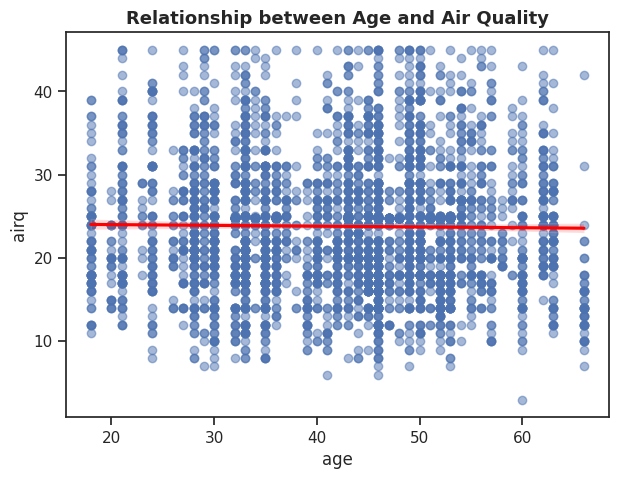

In [33]:
# 1. Numerical vs Numerical Relationships
print("\nNumerical vs Numerical ")

# a. Pairplot (gives quick overview of relationships)
print("\nDrawing Pairplot for numeric features...")
numeric_vars = ['time', 'dos', 'age', 'airq']
sns.pairplot(df_0046[numeric_vars], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Plots of Numerical Variables", y=1.02, fontsize=14, weight='bold')
plt.show()

# b. Regression Plot Example
print("\nScatterplot with regression line...")
plt.figure(figsize=(7,5))
sns.regplot(data=df_0046, x='age', y='airq', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship between Age and Air Quality", fontsize=13, weight='bold')
plt.show()


Numerical vs Categorical

Violin plot for Air Quality by Sex...


/tmp/ipython-input-1152119473.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_0046, x='sex', y='airq', palette="Set2")


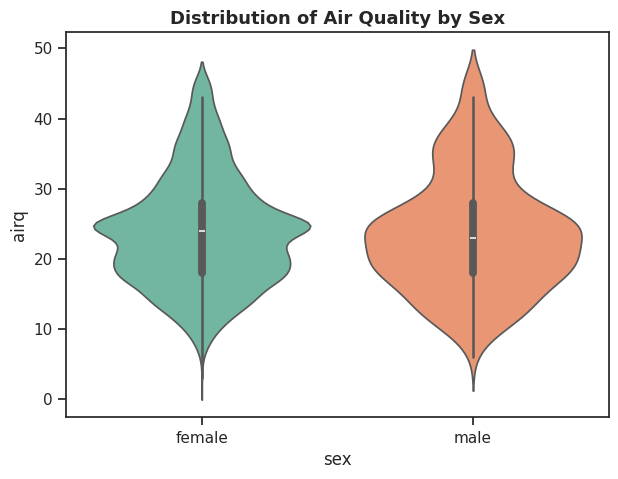


Strip plot for Age by Medication...


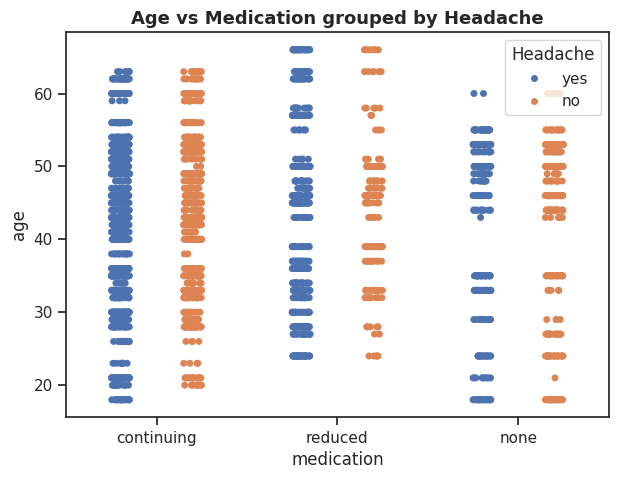

In [34]:
# 2. Numerical vs Categorical Relationships
print("\nNumerical vs Categorical")

# a. Violin Plot Example
print("\nViolin plot for Air Quality by Sex...")
plt.figure(figsize=(7,5))
sns.violinplot(data=df_0046, x='sex', y='airq', palette="Set2")
plt.title("Distribution of Air Quality by Sex", fontsize=13, weight='bold')
plt.show()

# b. Strip Plot Example
print("\nStrip plot for Age by Medication...")
plt.figure(figsize=(7,5))
sns.stripplot(data=df_0046, x='medication', y='age', jitter=True, hue='headache', dodge=True)
plt.title("Age vs Medication grouped by Headache", fontsize=13, weight='bold')
plt.legend(title='Headache')
plt.show()


>>> Categorical vs Categorical <<<

Generating Heatmap for Sex vs Headache...


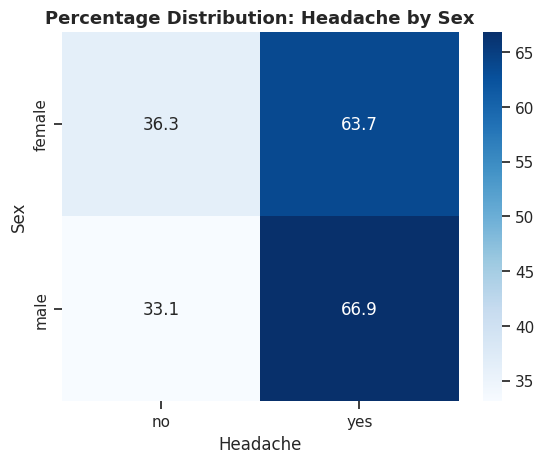


Creating Stacked Bar Chart for Medication vs Headache...


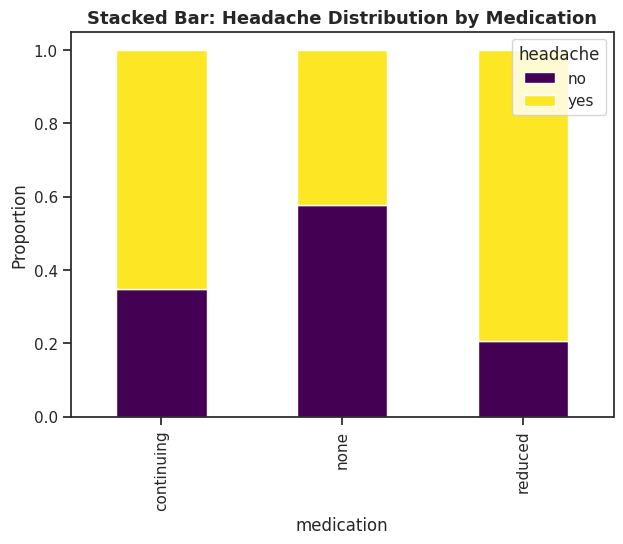

In [35]:
# 3. Categorical vs Categorical Relationships
print("\n>>> Categorical vs Categorical <<<")

# a. Heatmap from Crosstab
print("\nGenerating Heatmap for Sex vs Headache...")
crosstab_sh = pd.crosstab(df_0046['sex'], df_0046['headache'], normalize='index') * 100
sns.heatmap(crosstab_sh, annot=True, cmap='Blues', fmt='.1f')
plt.title("Percentage Distribution: Headache by Sex", fontsize=13, weight='bold')
plt.ylabel("Sex")
plt.xlabel("Headache")
plt.show()

# b. Stacked Bar Chart Example
print("\nCreating Stacked Bar Chart for Medication vs Headache...")
crosstab_mh = pd.crosstab(df_0046['medication'], df_0046['headache'])
crosstab_mh.div(crosstab_mh.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(7,5), colormap='viridis')
plt.title("Stacked Bar: Headache Distribution by Medication", fontsize=13, weight='bold')
plt.ylabel("Proportion")
plt.show()

## 3D Analysis

Visualizing 'age' across 'sex' grouped by 'hatype'


/tmp/ipython-input-1120913089.py:18: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.swarmplot(data=df_0046,
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


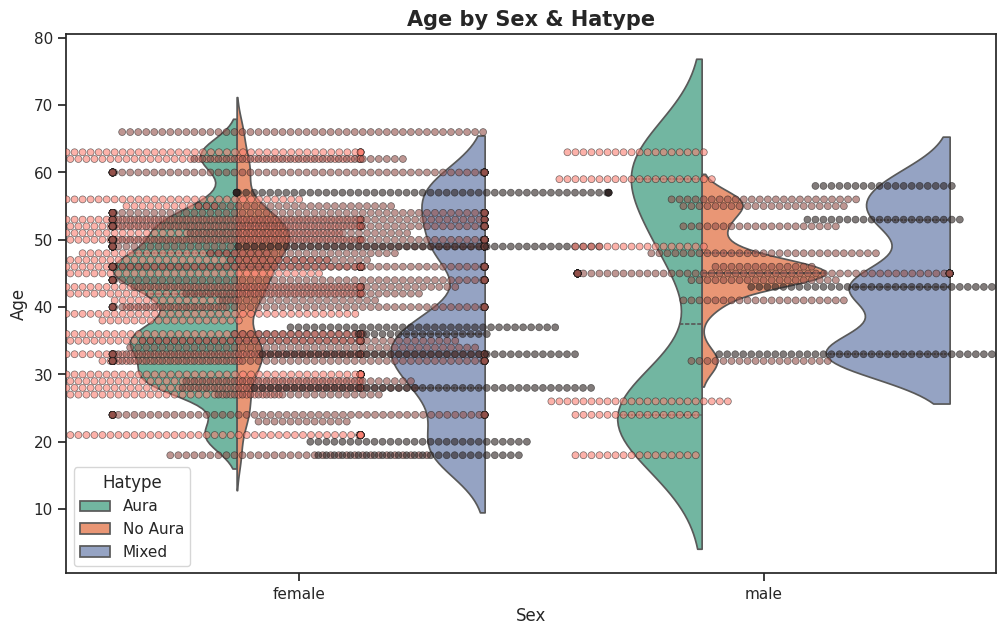


Facet grid for each hue category


/tmp/ipython-input-1120913089.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=df_0046,


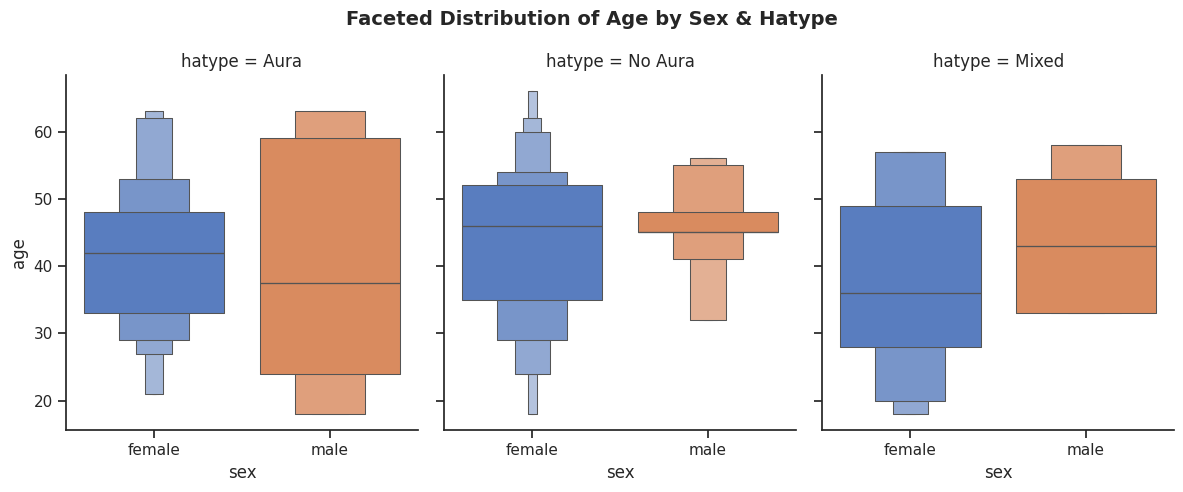

In [37]:
num_col = 'age'
cat_col_x = 'sex'
cat_col_hue = 'hatype'

print(f"Visualizing '{num_col}' across '{cat_col_x}' grouped by '{cat_col_hue}'")

plt.figure(figsize=(12, 7))

# Violin plot for distribution + swarm for raw points
sns.violinplot(data=df_0046,
               x=cat_col_x,
               y=num_col,
               hue=cat_col_hue,
               split=True,
               inner="quart",
               palette="Set2")

sns.swarmplot(data=df_0046,
              x=cat_col_x,
              y=num_col,
              hue=cat_col_hue,
              dodge=True,
              alpha=0.6,
              marker="o",
              edgecolor="gray",
              linewidth=0.5,
              palette="dark:salmon_r")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:len(set(df_0046[cat_col_hue]))],
           labels[:len(set(df_0046[cat_col_hue]))],
           title=cat_col_hue.replace("_", " ").title())

plt.title(f"{num_col.replace('_',' ').title()} by {cat_col_x.title()} & {cat_col_hue.title()}",
          fontsize=15, weight="bold")
plt.xlabel(cat_col_x.replace("_", " ").title())
plt.ylabel(num_col.replace("_", " ").title())
plt.show()

# FACETED VIEW
print("\nFacet grid for each hue category")
g = sns.catplot(data=df_0046,
                x=cat_col_x,
                y=num_col,
                col=cat_col_hue,
                kind="boxen",
                height=5,
                aspect=0.8,
                palette="muted")

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(f"Faceted Distribution of {num_col.title()} by {cat_col_x.title()} & {cat_col_hue.title()}",
               fontsize=14, weight="bold")
plt.show()


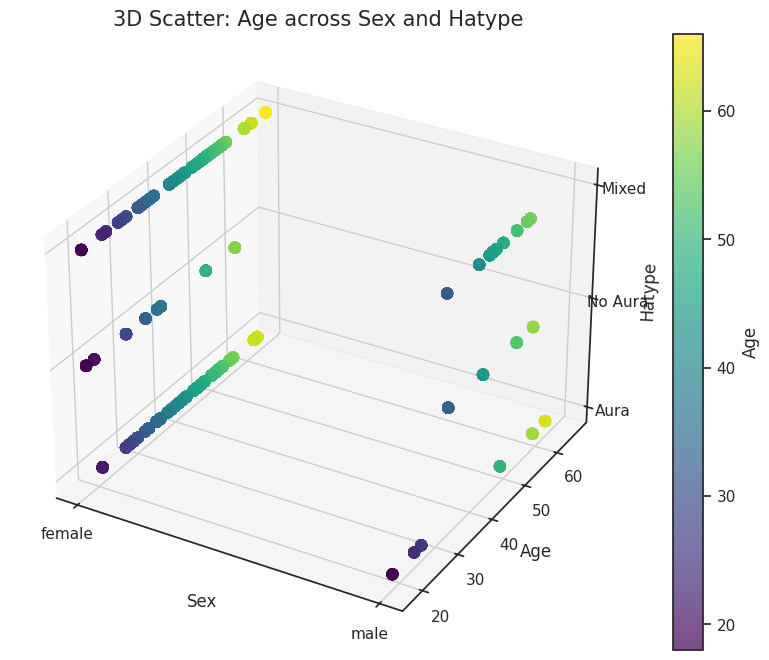

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 3D Analysis: Age vs Sex vs Hatype

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sex_codes = df_0046['sex'].astype('category').cat.codes
hatype_codes = df_0046['hatype'].astype('category').cat.codes

sc = ax.scatter(
    sex_codes,
    df_0046['age'],
    hatype_codes,
    c=df_0046['age'], cmap='viridis', s=60, alpha=0.7
)

ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_zlabel('Hatype')

ax.set_xticks(range(len(df_0046['sex'].unique())))
ax.set_xticklabels(df_0046['sex'].unique())

ax.set_zticks(range(len(df_0046['hatype'].unique())))
ax.set_zticklabels(df_0046['hatype'].unique())

cbar = plt.colorbar(sc)
cbar.set_label('Age')

plt.title('3D Scatter: Age across Sex and Hatype', fontsize=15)
plt.show()


#Clustering

🔹 Features chosen for clustering:
['rownames', 'time', 'dos', 'age', 'airq', 'sex_encoded']


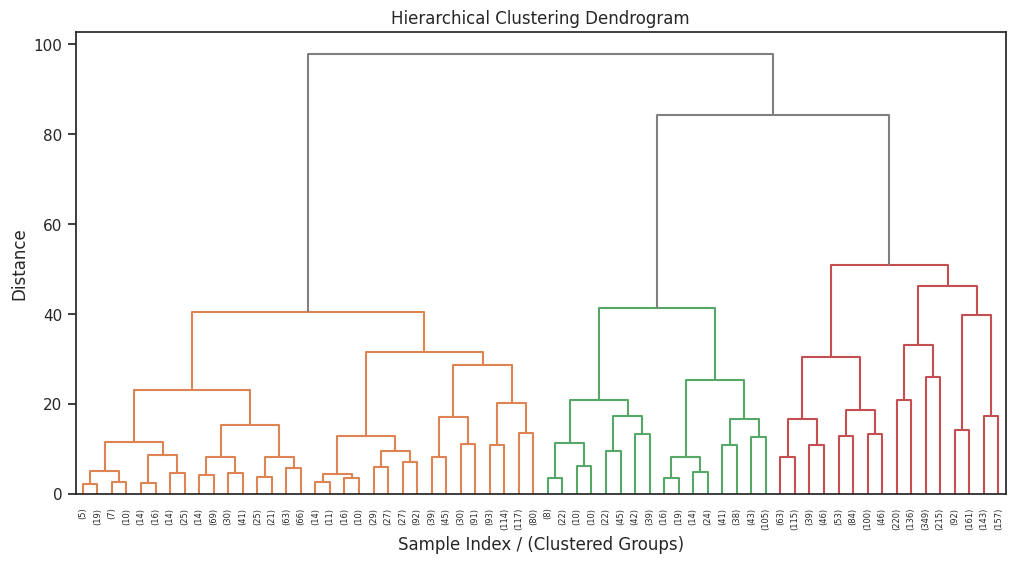


Cluster labels assigned with k=3:
cluster
3    2019
1    1274
2     498
Name: count, dtype: int64
      sex  age  airq  cluster
0  female   30   9.0        1
1  female   30   7.0        1
2  female   30  10.0        1
3  female   30  13.0        1
4  female   30  18.0        1


In [40]:
df_0046 = df_0046.dropna().copy()

df_0046.columns = (
    df_0046.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
)

le = LabelEncoder()
df_0046["sex_encoded"] = le.fit_transform(df_0046["sex"])


# 2. Feature Selection + Scaling

numeric_cols = df_0046.select_dtypes(include=np.number).columns.tolist()
for col in ["id"]:
    if col in numeric_cols:
        numeric_cols.remove(col)

X = df_0046[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔹 Features chosen for clustering:")
print(numeric_cols)
print("=" * 60)

# 3. Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    truncate_mode="level",   # Show top levels for readability
    p=5,                     # show 5 cluster levels
    color_threshold=None,
    above_threshold_color="grey"
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index / (Clustered Groups)")
plt.ylabel("Distance")
plt.show()

# 4. Cluster Assignment
k = 3
df_0046["cluster"] = fcluster(linkage_matrix, k, criterion="maxclust")

print(f"\nCluster labels assigned with k={k}:")
print(df_0046["cluster"].value_counts())
print("=" * 60)

# Quick look at cluster assignments
print(df_0046[["sex", "age", "airq", "cluster"]].head())
